## algorithmic modeling

### l1_l2는 함수형 패러다임, 함수형 패러다임의 문제점
- option주는 거 빡셈
- 파라미터 변경 빡셈

### 그래서 커링 테크닉 쓴다

### drop out
- overfitting 막는 용으로 사용한다.
- random하게 node를 제거한다.
- drop out을 0.5로 지정하면 노드 4개 중 2개를 랜덤하게 없앤다.
- catastrophic forgetting(파괴적 망각)을 막는다.
- 앙상블 효과를 가진다.
- batch랑 같이 쓰면 효과가 없다 같이 쓰면 충돌이 날 수 있기 때문이다.
- layer가 크면 배치, 작으면 dropout을 쓴다 주로
- 근데 학습할 때만 랜덤하게 없앤다.
- 실제 학습이 끝난 이후에는 작동 안 한다. 그래서 옵션으로 training=(True, False) 로 dropout 기능을 껐다 킬 수 있다.
- 그래서 학습할 때랑 실제랑 모델 모양이 달라진다.
- tf.keras.layers.Dropout(0.2) : 바로 앞의 layer에서 20퍼 삭제하고 학습한다.
- 크면 클수록 dropout한다 overfitting할 가능성이 높아서.

### ReLU 
- ...현상?

### overfitting
- regularizer를 추가하거나 dropout을 추가하면 된다.
- 영원히 막을 순 없다. 에포크 횟수가 증가하면 다시 발생하는 overfitting...

### regularization
- L1
- L2(=weight decay)
- bias_regularizer

### perceptron 갯수를 2의 배수로 하는 이유 = vetorization
- GPU가 짝수개로 분해시킨다.
- 3개를 실행시키나 4개 실행시키나 똑같다.
- 자원을 최대한 많이 쓸 수 있기 때문에.

### training error
- 낙관적 편향
- resubstation sampling
- 진짜 성능보다 좋게 나온다 (=문제봤던걸로 시험보니까 점수가 좋을 수 밖에 없음)

### callback
- 어떤 것이 실행되고 연속으로 실행되는 개념

### overriding
- 주의할 점: 부모와 똑같은 파라미터 만들어야한다.

### layer overriding
- custom 가능

In [1]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [2]:
import tensorflow as tf

In [ ]:
tf.keras.regularizers.l1_l2

In [ ]:
Lasso

In [ ]:
tf.keras.layers.Dense

In [4]:
!pip install -U scikeras

In [3]:
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier # 옛날에 쓰던거
from scikeras.wrappers import KerasClassifier # 요즘 쓰는 거

In [6]:
# 저질 예시
def build():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(16, input_shape=(4,)),
        tf.keras.layers.Dense(3)
    ])
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy())
    return model

In [20]:
model = KerasClassifier(build_fn=build, epochs=10)

In [8]:
from sklearn.datasets import load_iris

In [11]:
data = load_iris()

In [16]:
from sklearn.model_selection import cross_val_score, learning_curve

In [13]:
cross_val_score(model, data.data, data.target, cv=3)

C:\Users\dlel2\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


2/2 [==============================] - 0s 4ms/step


C:\Users\dlel2\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


2/2 [==============================] - 0s 5ms/step


C:\Users\dlel2\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


2/2 [==============================] - 0s 4ms/step


array([0.34, 0.32, 0.66])

In [21]:
ts, tsc, tes = learning_curve(model, data.data, data.target, cv=3)

Epoch 1/10


C:\Users\dlel2\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


1/1 [==============================] - 1s 561ms/step - loss: 1.4721
Epoch 2/10
1/1 [==============================] - 0s 8ms/step - loss: 1.1991
Epoch 3/10
1/1 [==============================] - 0s 9ms/step - loss: 1.1602
Epoch 4/10
1/1 [==============================] - 0s 10ms/step - loss: 1.1375
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 1.1304
Epoch 6/10
1/1 [==============================] - 0s 9ms/step - loss: 1.1262
Epoch 7/10
1/1 [==============================] - 0s 12ms/step - loss: 1.1239
Epoch 8/10
1/1 [==============================] - 0s 10ms/step - loss: 1.1217
Epoch 9/10
1/1 [==============================] - 0s 10ms/step - loss: 1.1195
Epoch 10/10
1/1 [==============================] - 0s 48ms/step


C:\Users\dlel2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dlel2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dlel2\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\dlel2\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1114, in score
    y_pred = self.predict(X)
  File "C:\Users\dlel2\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.target_encoder_.inverse_transform(y_pred)
  File "C:\Users\dlel2\anaconda3\lib\site-packages\scikeras\utils\transformers.py", line 256, in inverse_transform
    class_predictions = self._final_encoder.inver

Epoch 1/10
1/1 [==============================] - 1s 794ms/step - loss: 0.7698
Epoch 2/10
1/1 [==============================] - 0s 11ms/step - loss: 0.3237
Epoch 3/10
1/1 [==============================] - 0s 16ms/step - loss: 0.2075
Epoch 4/10
1/1 [==============================] - 0s 10ms/step - loss: 0.1283
Epoch 5/10
1/1 [==============================] - 0s 11ms/step - loss: 0.0712
Epoch 6/10
1/1 [==============================] - 0s 11ms/step - loss: 0.0422
Epoch 7/10
1/1 [==============================] - 0s 10ms/step - loss: 0.0317
Epoch 8/10
1/1 [==============================] - 0s 15ms/step - loss: 0.0273
Epoch 9/10
1/1 [==============================] - 0s 12ms/step - loss: 0.0238
Epoch 10/10
1/1 [==============================] - 0s 47ms/step


C:\Users\dlel2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dlel2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dlel2\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\dlel2\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1114, in score
    y_pred = self.predict(X)
  File "C:\Users\dlel2\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.target_encoder_.inverse_transform(y_pred)
  File "C:\Users\dlel2\anaconda3\lib\site-packages\scikeras\utils\transformers.py", line 256, in inverse_transform
    class_predictions = self._final_encoder.inver

Epoch 1/10
2/2 [==============================] - 1s 11ms/step - loss: 10.3640
Epoch 2/10
2/2 [==============================] - 0s 13ms/step - loss: 10.3640
Epoch 3/10
2/2 [==============================] - 0s 7ms/step - loss: 10.3640
Epoch 4/10
2/2 [==============================] - 0s 6ms/step - loss: 10.3640
Epoch 5/10
2/2 [==============================] - 0s 4ms/step - loss: 10.3640
Epoch 6/10
2/2 [==============================] - 0s 10ms/step - loss: 10.3640
Epoch 7/10
2/2 [==============================] - 0s 11ms/step - loss: 10.3640
Epoch 8/10
2/2 [==============================] - 0s 12ms/step - loss: 10.3640
Epoch 9/10
2/2 [==============================] - 0s 7ms/step - loss: 10.3640
Epoch 10/10
2/2 [==============================] - 0s 0s/step
Epoch 1/10


C:\Users\dlel2\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


3/3 [==============================] - 1s 10ms/step - loss: 7.8218
Epoch 2/10
3/3 [==============================] - 0s 4ms/step - loss: 7.6661
Epoch 3/10
3/3 [==============================] - 0s 6ms/step - loss: 7.6228
Epoch 4/10
3/3 [==============================] - 0s 2ms/step - loss: 7.6070
Epoch 5/10
3/3 [==============================] - 0s 7ms/step - loss: 7.6035
Epoch 6/10
3/3 [==============================] - 0s 7ms/step - loss: 7.6027
Epoch 7/10
3/3 [==============================] - 0s 6ms/step - loss: 7.6025
Epoch 8/10
3/3 [==============================] - 0s 6ms/step - loss: 7.6022
Epoch 9/10
3/3 [==============================] - 0s 9ms/step - loss: 7.6020
Epoch 10/10
3/3 [==============================] - 0s 4ms/step
Epoch 1/10


C:\Users\dlel2\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


4/4 [==============================] - 1s 10ms/step - loss: 5.7367
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 5.7090
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 5.6569
Epoch 4/10
4/4 [==============================] - 0s 6ms/step - loss: 5.6400
Epoch 5/10
4/4 [==============================] - 0s 6ms/step - loss: 5.6235
Epoch 6/10
4/4 [==============================] - 0s 5ms/step - loss: 5.6096
Epoch 7/10
4/4 [==============================] - 0s 5ms/step - loss: 5.6017
Epoch 8/10
4/4 [==============================] - 0s 6ms/step - loss: 5.6013
Epoch 9/10
4/4 [==============================] - 0s 4ms/step - loss: 5.5814
Epoch 10/10
4/4 [==============================] - 0s 4ms/step
Epoch 1/10


C:\Users\dlel2\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


1/1 [==============================] - 1s 801ms/step - loss: 1.0967e-06
Epoch 2/10
1/1 [==============================] - 0s 0s/step - loss: 1.0729e-06
Epoch 3/10
1/1 [==============================] - 0s 16ms/step - loss: 1.0729e-06
Epoch 4/10
1/1 [==============================] - 0s 19ms/step - loss: 1.0490e-06
Epoch 5/10
1/1 [==============================] - 0s 11ms/step - loss: 1.0490e-06
Epoch 6/10
1/1 [==============================] - 0s 0s/step - loss: 1.0014e-06
Epoch 7/10
1/1 [==============================] - 0s 0s/step - loss: 1.0014e-06
Epoch 8/10
1/1 [==============================] - 0s 17ms/step - loss: 9.5367e-07
Epoch 9/10
1/1 [==============================] - 0s 17ms/step - loss: 9.5367e-07
Epoch 10/10
1/1 [==============================] - 0s 55ms/step


C:\Users\dlel2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dlel2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dlel2\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\dlel2\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1114, in score
    y_pred = self.predict(X)
  File "C:\Users\dlel2\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.target_encoder_.inverse_transform(y_pred)
  File "C:\Users\dlel2\anaconda3\lib\site-packages\scikeras\utils\transformers.py", line 256, in inverse_transform
    class_predictions = self._final_encoder.inver

Epoch 1/10
1/1 [==============================] - 1s 703ms/step - loss: 16.1181
Epoch 2/10
1/1 [==============================] - 0s 9ms/step - loss: 16.1181
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 16.1181
Epoch 4/10
1/1 [==============================] - 0s 9ms/step - loss: 16.1181
Epoch 5/10
1/1 [==============================] - 0s 12ms/step - loss: 16.1181
Epoch 6/10
1/1 [==============================] - 0s 10ms/step - loss: 16.1181
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 16.1181
Epoch 8/10
1/1 [==============================] - 0s 10ms/step - loss: 16.1181
Epoch 9/10
1/1 [==============================] - 0s 14ms/step - loss: 16.1181
Epoch 10/10
1/1 [==============================] - 0s 31ms/step


C:\Users\dlel2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dlel2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dlel2\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\dlel2\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1114, in score
    y_pred = self.predict(X)
  File "C:\Users\dlel2\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.target_encoder_.inverse_transform(y_pred)
  File "C:\Users\dlel2\anaconda3\lib\site-packages\scikeras\utils\transformers.py", line 256, in inverse_transform
    class_predictions = self._final_encoder.inver

Epoch 1/10
2/2 [==============================] - 1s 16ms/step - loss: 1.0986
Epoch 2/10
2/2 [==============================] - 0s 11ms/step - loss: 1.0986
Epoch 3/10
2/2 [==============================] - 0s 11ms/step - loss: 1.0986
Epoch 4/10
2/2 [==============================] - 0s 11ms/step - loss: 1.0986
Epoch 5/10
2/2 [==============================] - 0s 8ms/step - loss: 1.0986
Epoch 6/10
2/2 [==============================] - 0s 9ms/step - loss: 1.0986
Epoch 7/10
2/2 [==============================] - 0s 8ms/step - loss: 1.0986
Epoch 8/10
2/2 [==============================] - 0s 12ms/step - loss: 1.0986
Epoch 9/10
2/2 [==============================] - 0s 11ms/step - loss: 1.0986
Epoch 10/10
2/2 [==============================] - 0s 5ms/step


C:\Users\dlel2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dlel2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dlel2\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\dlel2\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1114, in score
    y_pred = self.predict(X)
  File "C:\Users\dlel2\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.target_encoder_.inverse_transform(y_pred)
  File "C:\Users\dlel2\anaconda3\lib\site-packages\scikeras\utils\transformers.py", line 256, in inverse_transform
    class_predictions = self._final_encoder.inver

Epoch 1/10
3/3 [==============================] - 1s 9ms/step - loss: 1.0986
Epoch 2/10
3/3 [==============================] - 0s 7ms/step - loss: 1.0986
Epoch 3/10
3/3 [==============================] - 0s 5ms/step - loss: 1.0986
Epoch 4/10
3/3 [==============================] - 0s 5ms/step - loss: 1.0986
Epoch 5/10
3/3 [==============================] - 0s 0s/step - loss: 1.0986
Epoch 6/10
3/3 [==============================] - 0s 8ms/step - loss: 1.0986
Epoch 7/10
3/3 [==============================] - 0s 8ms/step - loss: 1.0986
Epoch 8/10
3/3 [==============================] - 0s 8ms/step - loss: 1.0986
Epoch 9/10
3/3 [==============================] - 0s 0s/step - loss: 1.0986
Epoch 10/10
3/3 [==============================] - 0s 11ms/step
Epoch 1/10


C:\Users\dlel2\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


4/4 [==============================] - 1s 5ms/step - loss: 10.7991
Epoch 2/10
4/4 [==============================] - 0s 6ms/step - loss: 10.7991
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 10.7991
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 10.7991
Epoch 5/10
4/4 [==============================] - 0s 5ms/step - loss: 10.7991
Epoch 6/10
4/4 [==============================] - 0s 3ms/step - loss: 10.7991
Epoch 7/10
4/4 [==============================] - 0s 5ms/step - loss: 10.7991
Epoch 8/10
4/4 [==============================] - 0s 6ms/step - loss: 10.7991
Epoch 9/10
4/4 [==============================] - 0s 5ms/step - loss: 10.7991
Epoch 10/10
4/4 [==============================] - 0s 0s/step
Epoch 1/10


C:\Users\dlel2\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


1/1 [==============================] - 1s 807ms/step - loss: 1.0986
Epoch 2/10
1/1 [==============================] - 0s 10ms/step - loss: 1.0986
Epoch 3/10
1/1 [==============================] - 0s 10ms/step - loss: 1.0986
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 1.0986
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 1.0986
Epoch 6/10
1/1 [==============================] - 0s 10ms/step - loss: 1.0986
Epoch 7/10
1/1 [==============================] - 0s 15ms/step - loss: 1.0986
Epoch 8/10
1/1 [==============================] - 0s 12ms/step - loss: 1.0986
Epoch 9/10
1/1 [==============================] - 0s 12ms/step - loss: 1.0986
Epoch 10/10
1/1 [==============================] - 0s 47ms/step


C:\Users\dlel2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dlel2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dlel2\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\dlel2\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1114, in score
    y_pred = self.predict(X)
  File "C:\Users\dlel2\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.target_encoder_.inverse_transform(y_pred)
  File "C:\Users\dlel2\anaconda3\lib\site-packages\scikeras\utils\transformers.py", line 256, in inverse_transform
    class_predictions = self._final_encoder.inver

Epoch 1/10
1/1 [==============================] - 1s 803ms/step - loss: 16.4480
Epoch 2/10
1/1 [==============================] - 0s 8ms/step - loss: 16.2296
Epoch 3/10
1/1 [==============================] - 0s 17ms/step - loss: 16.1181
Epoch 4/10
1/1 [==============================] - 0s 10ms/step - loss: 16.1181
Epoch 5/10
1/1 [==============================] - 0s 11ms/step - loss: 16.1181
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 16.1181
Epoch 7/10
1/1 [==============================] - 0s 8ms/step - loss: 16.1181
Epoch 8/10
1/1 [==============================] - 0s 14ms/step - loss: 16.1181
Epoch 9/10
1/1 [==============================] - 0s 12ms/step - loss: 16.1181
Epoch 10/10
1/1 [==============================] - 0s 47ms/step


C:\Users\dlel2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dlel2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dlel2\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\dlel2\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1114, in score
    y_pred = self.predict(X)
  File "C:\Users\dlel2\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.target_encoder_.inverse_transform(y_pred)
  File "C:\Users\dlel2\anaconda3\lib\site-packages\scikeras\utils\transformers.py", line 256, in inverse_transform
    class_predictions = self._final_encoder.inver

Epoch 1/10
2/2 [==============================] - 1s 4ms/step - loss: 16.1181
Epoch 2/10
2/2 [==============================] - 0s 2ms/step - loss: 16.1181
Epoch 3/10
2/2 [==============================] - 0s 8ms/step - loss: 16.1181
Epoch 4/10
2/2 [==============================] - 0s 6ms/step - loss: 16.1181
Epoch 5/10
2/2 [==============================] - 0s 6ms/step - loss: 16.1181
Epoch 6/10
2/2 [==============================] - 0s 8ms/step - loss: 16.1181
Epoch 7/10
2/2 [==============================] - 0s 15ms/step - loss: 16.1181
Epoch 8/10
2/2 [==============================] - 0s 7ms/step - loss: 16.1181
Epoch 9/10
2/2 [==============================] - 0s 9ms/step - loss: 16.1181
Epoch 10/10
2/2 [==============================] - 0s 15ms/step


C:\Users\dlel2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dlel2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\dlel2\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\dlel2\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1114, in score
    y_pred = self.predict(X)
  File "C:\Users\dlel2\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1054, in predict
    y_pred = self.target_encoder_.inverse_transform(y_pred)
  File "C:\Users\dlel2\anaconda3\lib\site-packages\scikeras\utils\transformers.py", line 256, in inverse_transform
    class_predictions = self._final_encoder.inver

Epoch 1/10
3/3 [==============================] - 1s 9ms/step - loss: 7.8404
Epoch 2/10
3/3 [==============================] - 0s 8ms/step - loss: 7.8117
Epoch 3/10
3/3 [==============================] - 0s 6ms/step - loss: 7.8107
Epoch 4/10
3/3 [==============================] - 0s 5ms/step - loss: 7.8102
Epoch 5/10
3/3 [==============================] - 0s 6ms/step - loss: 7.8102
Epoch 6/10
3/3 [==============================] - 0s 7ms/step - loss: 7.8102
Epoch 7/10
3/3 [==============================] - 0s 4ms/step - loss: 7.8102
Epoch 8/10
3/3 [==============================] - 0s 7ms/step - loss: 7.8102
Epoch 9/10
3/3 [==============================] - 0s 8ms/step - loss: 7.8102
Epoch 10/10
3/3 [==============================] - 0s 8ms/step


C:\Users\dlel2\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
4/4 [==============================] - 1s 6ms/step - loss: 10.7991
Epoch 2/10
4/4 [==============================] - 0s 6ms/step - loss: 10.7991
Epoch 3/10
4/4 [==============================] - 0s 6ms/step - loss: 10.7991
Epoch 4/10
4/4 [==============================] - 0s 5ms/step - loss: 10.7991
Epoch 5/10
4/4 [==============================] - 0s 6ms/step - loss: 10.7991
Epoch 6/10
4/4 [==============================] - 0s 7ms/step - loss: 10.7991
Epoch 7/10
4/4 [==============================] - 0s 8ms/step - loss: 10.7991
Epoch 8/10
4/4 [==============================] - 0s 6ms/step - loss: 10.7991
Epoch 9/10
4/4 [==============================] - 0s 7ms/step - loss: 10.7991
Epoch 10/10
4/4 [==============================] - 0s 648us/step


In [18]:
import sklearn_evaluation

<Axes: title={'center': 'Learning Curve'}, xlabel='Training examples', ylabel='Score mean'>

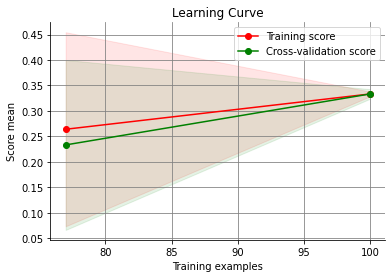

In [22]:
sklearn_evaluation.plot.learning_curve(tsc, tes,ts)
# data가 턱없이 부족하다.

In [26]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(16, input_shape=(4,)),
        tf.keras.layers.Dense(3)
    ])
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy())

In [27]:
model.fit(data.data, data.target)

5/5 [==============================] - 1s 4ms/step - loss: 10.6652


In [28]:
history = model.fit(data.data, data.target, epochs=10, validation_split=0.3)

Epoch 1/10
4/4 [==============================] - 0s 79ms/step - loss: 8.4438 - val_loss: 16.1181
Epoch 2/10
4/4 [==============================] - 0s 21ms/step - loss: 8.4428 - val_loss: 16.1181
Epoch 3/10
4/4 [==============================] - 0s 20ms/step - loss: 8.4428 - val_loss: 16.1181
Epoch 4/10
4/4 [==============================] - 0s 22ms/step - loss: 8.4428 - val_loss: 16.1181
Epoch 5/10
4/4 [==============================] - 0s 23ms/step - loss: 8.4428 - val_loss: 16.1181
Epoch 6/10
4/4 [==============================] - 0s 25ms/step - loss: 8.4428 - val_loss: 16.1181
Epoch 7/10
4/4 [==============================] - 0s 25ms/step - loss: 8.4428 - val_loss: 16.1181
Epoch 8/10
4/4 [==============================] - 0s 22ms/step - loss: 8.4428 - val_loss: 16.1181
Epoch 9/10
4/4 [==============================] - 0s 26ms/step - loss: 8.4428 - val_loss: 16.1181
Epoch 10/10
4/4 [==============================] - 0s 29ms/step - loss: 8.4428 - val_loss: 16.1181


In [32]:
class MyC(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None): # override
        print(epoch, '시작')

In [33]:
# early stopping을 활용할 수 있다는 생각이 드네
# callback을 사용하면!!!!!
history = model.fit(data.data, data.target, epochs=10, validation_split=0.3, callbacks=[MyC()])

0 시작
Epoch 1/10
4/4 [==============================] - 0s 36ms/step - loss: 8.4428 - val_loss: 16.1181
1 시작
Epoch 2/10
4/4 [==============================] - 0s 19ms/step - loss: 8.4428 - val_loss: 16.1181
2 시작
Epoch 3/10
4/4 [==============================] - 0s 19ms/step - loss: 8.4428 - val_loss: 16.1181
3 시작
Epoch 4/10
4/4 [==============================] - 0s 22ms/step - loss: 8.4428 - val_loss: 16.1181
4 시작
Epoch 5/10
4/4 [==============================] - 0s 19ms/step - loss: 8.4428 - val_loss: 16.1181
5 시작
Epoch 6/10
4/4 [==============================] - 0s 22ms/step - loss: 8.4428 - val_loss: 16.1181
6 시작
Epoch 7/10
4/4 [==============================] - 0s 21ms/step - loss: 8.4428 - val_loss: 16.1181
7 시작
Epoch 8/10
4/4 [==============================] - 0s 21ms/step - loss: 8.4428 - val_loss: 16.1181
8 시작
Epoch 9/10
4/4 [==============================] - 0s 22ms/step - loss: 8.4428 - val_loss: 16.1181
9 시작
Epoch 10/10
4/4 [==============================] - 0s 39ms/step - lo

In [34]:
history.history

{'loss': [8.442811965942383,
  8.442811965942383,
  8.442811965942383,
  8.442811965942383,
  8.442811965942383,
  8.442811965942383,
  8.442811965942383,
  8.442811012268066,
  8.442811965942383,
  8.442811965942383],
 'val_loss': [16.11809539794922,
  16.11809539794922,
  16.11809539794922,
  16.11809539794922,
  16.11809539794922,
  16.11809539794922,
  16.11809539794922,
  16.11809539794922,
  16.11809539794922,
  16.11809539794922]}

In [ ]:
tf.keras.callbacks.LambdaCallback

In [ ]:
# 쥬피터는 파이참처럼 하이퍼파라미터 자동으로 안 나오니 검색해서 직접 복붙해라
tf.keras.callbacks.Callback.on_epoch_begin

In [30]:
# 기능 추가하려면 dir해서 뭐가 있는지 보고
dir(MyC)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_implements_predict_batch_hooks',
 '_implements_test_batch_hooks',
 '_implements_train_batch_hooks',
 '_keras_api_names',
 '_keras_api_names_v1',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'set_model',
 'set_params']